In [60]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import KFold

from math import sqrt
import seaborn as sns
from sklearn. model_selection import train_test_split
from sklearn. preprocessing import PolynomialFeatures

In [61]:
df = pd.read_csv('./used_device_data.csv')
print(df.shape)
df

(3454, 15)


,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [62]:
def delete_null(df):
    for elem in df:
        df = df[df[elem].isna() == False]
    return df

def change_categorical_to_numerical(df):
    for elem in df:
        if df[elem].dtypes == 'O':
            df[elem] = pd.factorize(df[elem])[0]
    return df

def get_independent_keys(df):
    indep = []
    dep = []
    for elem in df:
        if elem != 'normalized_used_price':
            indep.append(elem)
        else:
            dep.append(elem)
    return indep, dep

def get_r2score(y, _X):
    r2score = r2_score(y, _X)
    return r2score

def get_mae(y, _X):
    mae = mean_absolute_error(y, _X)
    return mae

def get_rmse(y, _X):
    mse = mean_squared_error(y, _X)
    rmse = sqrt(mse)
    return rmse

def get_mape(y, _X):
    mape = mean_absolute_percentage_error(y, _X)
    return mape

In [63]:
df = pd.read_csv('./used_device_data.csv')
df = delete_null(df)
df = change_categorical_to_numerical(df)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3253 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3253 non-null   int64  
 1   os                     3253 non-null   int64  
 2   screen_size            3253 non-null   float64
 3   4g                     3253 non-null   int64  
 4   5g                     3253 non-null   int64  
 5   rear_camera_mp         3253 non-null   float64
 6   front_camera_mp        3253 non-null   float64
 7   internal_memory        3253 non-null   float64
 8   ram                    3253 non-null   float64
 9   battery                3253 non-null   float64
 10  weight                 3253 non-null   float64
 11  release_year           3253 non-null   int64  
 12  days_used              3253 non-null   int64  
 13  normalized_used_price  3253 non-null   float64
 14  normalized_new_price   3253 non-null   float64
dtypes: f

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,0,0,14.50,0,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,0,0,17.30,0,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,0,0,16.69,0,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,0,0,25.50,0,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,0,0,15.32,0,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,14,2,15.27,0,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,15,0,15.24,0,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,17,0,15.80,0,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,17,0,15.80,0,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


device_brand


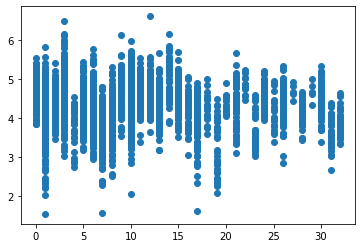

os


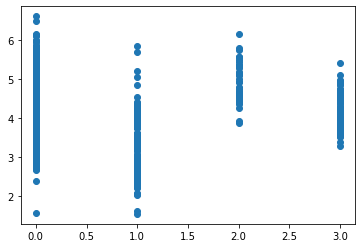

screen_size


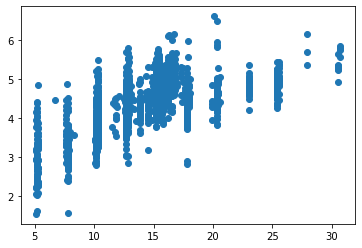

4g


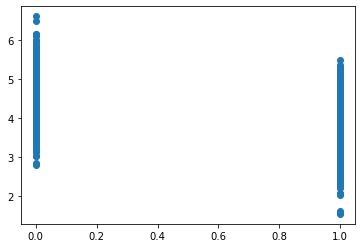

5g


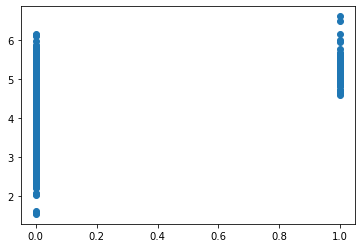

rear_camera_mp


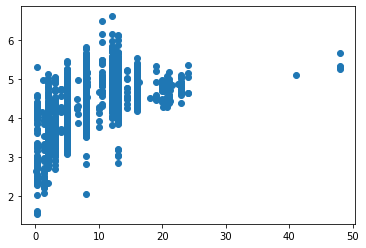

front_camera_mp


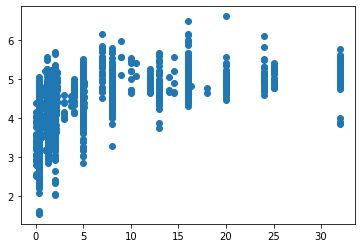

internal_memory


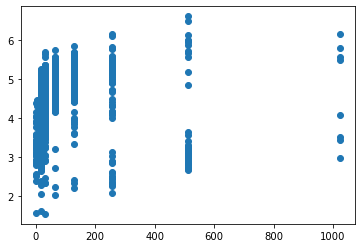

ram


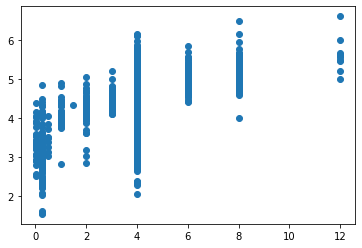

battery


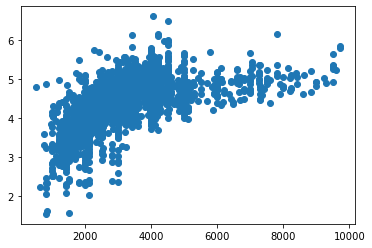

weight


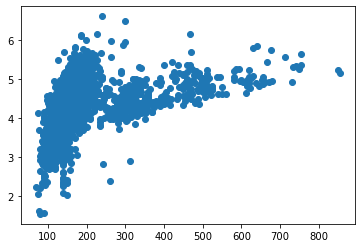

release_year


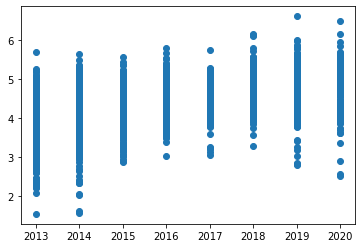

days_used


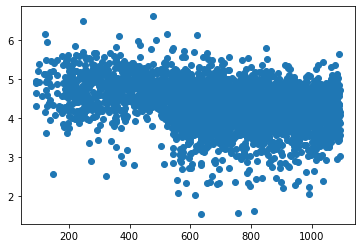

normalized_used_price


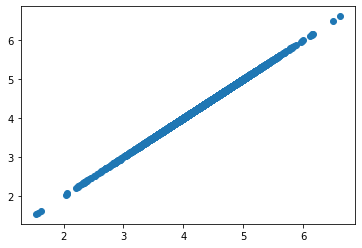

normalized_new_price


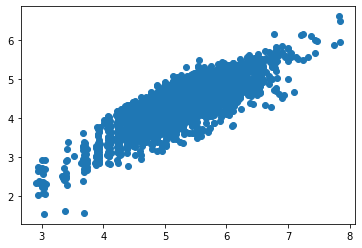

In [64]:
for elem in df:
    print(elem)
    plt.scatter(df[elem], df['normalized_used_price'])
    plt.show()

<AxesSubplot:>

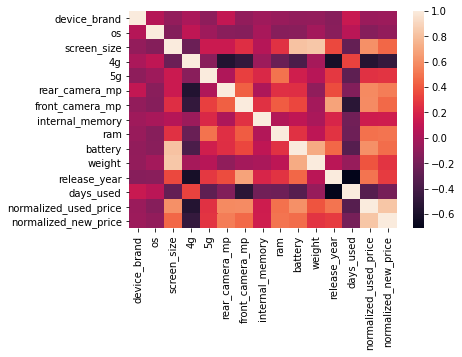

In [65]:
corr = df.corr()
sns.heatmap(corr)
# df.corr()

In [66]:
indep, dep = get_independent_keys(df)
X = df[indep]
y = df[dep]

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


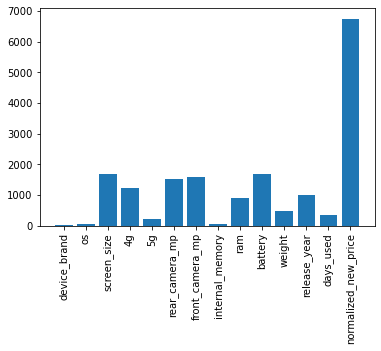

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


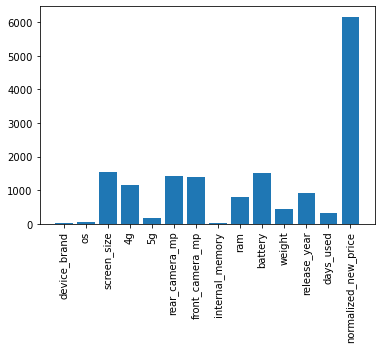

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


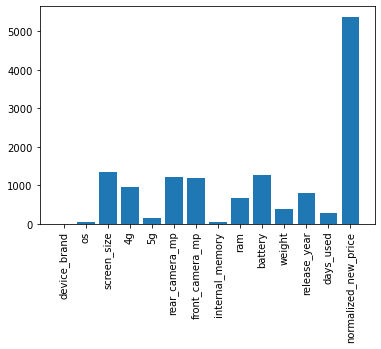

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


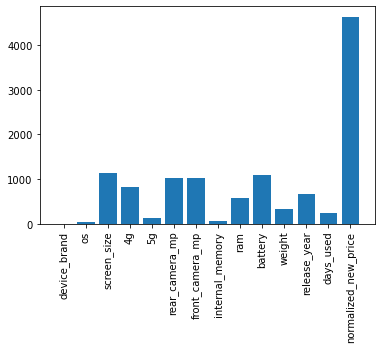

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


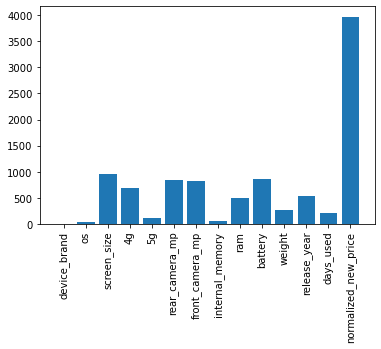

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


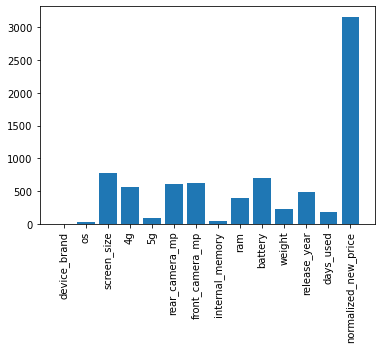

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


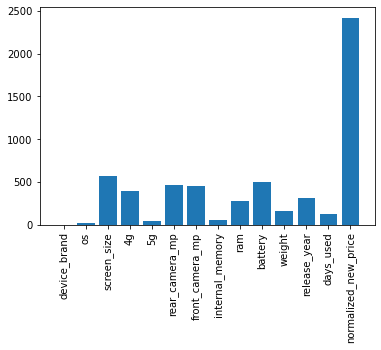

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


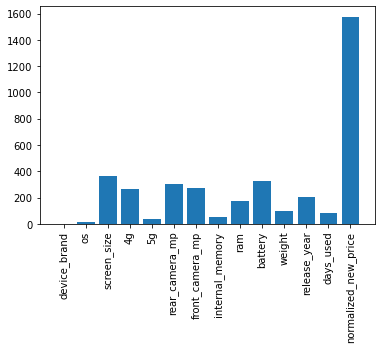

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


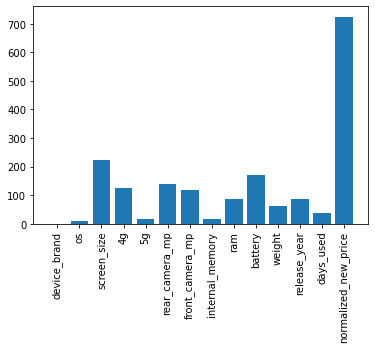

In [67]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

start = 0.1
end = 0.9
it = 0.1
while start <= end:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=start, random_state=1)
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    # for i in range(len(fs.scores_)):
    # 	print('Feature %s: %f' % (indep[i], fs.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.xticks(range(len(indep)), indep, rotation='vertical')
    plt.show()
    start += it

In [68]:
df_indep_features = df.copy(deep=True)
df_indep_features = df_indep_features.drop(columns=['battery', 'weight', 'internal_memory', '5g', 'os', 'device_brand'])

In [69]:
# def select_features(X, y):
#     fs = SelectKBest(score_func=f_regression, k=5)
#     z = fs.fit_transform(X, y)
#     print(z.shape)
    
#     filter = fs.get_support()
#     print(filter)
#     features = indep
#     for i in range(len(filter)):
#         if filter[i]:
#             print(indep[i], end = '\t')
            
# X
# y
# select_features(X, y)

# # plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# # plt.xticks(range(len(indep)), indep, rotation='vertical')
# # plt.show()

In [70]:
indep, dep = get_independent_keys(df_indep_features)
X = df_indep_features[indep]
y = df_indep_features[dep]

In [71]:
rmses = []
maes = []
r2scores = []
mapes = []

rmses_train = []
maes_train = []
r2scores_train = []
mapes_train = []
indexes = []
i = 0
start = 0.1
end = 0.9
while start <= end:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=start, random_state=1)    
    reg = LinearRegression().fit(X_train, y_train)
    coef = reg.coef_
    intercept = reg.intercept_
    _X = reg.predict(X_test)
    _X_train = reg.predict(X_train)

    r2score = get_r2score(y_test, _X)
    mae = get_mae(y_test, _X)
    rmse = get_rmse(y_test, _X)
    mape = get_mape(y_test, _X)
    
    rmses.append(rmse)
    maes.append(mae)
    r2scores.append(r2score)
    mapes.append(mape)
    indexes.append(start)
    
    rmses_train.append(get_rmse(y_train, _X_train))
    maes_train.append(get_mae(y_train, _X_train))
    r2scores_train.append(get_r2score(y_train, _X_train))
    mapes_train.append(get_mape(y_train, _X_train))
    start += 0.05
    
rmses = np.array(rmses)
maes = np.array(maes)
r2scores = np.array(r2scores)
mapes = np.array(mapes)

rmses_train = np.array(rmses_train)
maes_train = np.array(maes_train)
r2scores_train = np.array(r2scores_train)
mapes_train = np.array(mapes_train)
indexes = np.array(indexes)

In [72]:
def plot_metrics(x_axis, y_axis, y_axis_train, label, label_train, loc = 'lower left'):
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(x_axis, y_axis, s=10, c='b', marker="o", label=label)
    ax1.scatter(x_axis, y_axis_train, s=10, c='r', marker="o", label=label_train)

    plt.legend(loc=loc)
    plt.yscale('log', base=10)
    
    plt.show()

rmse 0.23516682508494693
mae 0.18430517546456196
mape 0.04445388145213047
r2score 0.8299471114175773


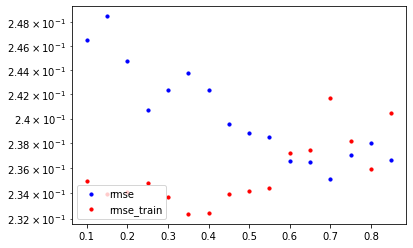

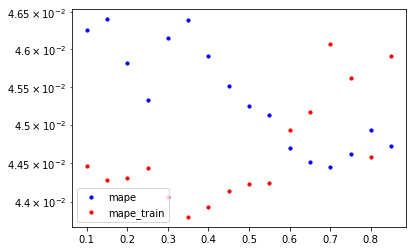

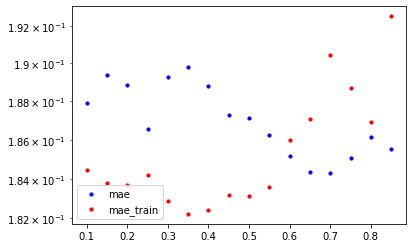

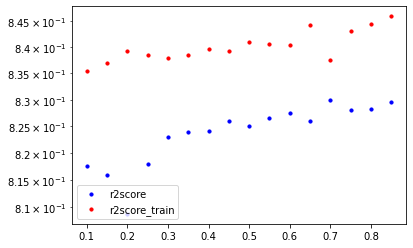

In [73]:
print('rmse', np.min(rmses))
print('mae', np.min(maes))
print('mape', np.min(mapes))
print('r2score', np.max(r2scores))

plot_metrics(indexes, rmses, rmses_train, 'rmse', 'rmse_train', loc = 'lower left')
plot_metrics(indexes, mapes, mapes_train, 'mape', 'mape_train', loc = 'lower left')
plot_metrics(indexes, maes, maes_train, 'mae', 'mae_train', loc = 'lower left')
plot_metrics(indexes, r2scores, r2scores_train, 'r2score', 'r2score_train', loc = 'lower left')


In [74]:
indep, dep = get_independent_keys(df_indep_features)
X = df_indep_features[indep]
y = df_indep_features[dep]

In [75]:
rmses = []
maes = []
r2scores = []
mapes = []


rmses_train = []
maes_train = []
r2scores_train = []
mapes_train = []
indexes = []
i = 0
start = 0.1
end = 0.9
while start <= end:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=start, random_state=1)    
    reg = LinearRegression().fit(X_train, y_train)
    coef = reg.coef_
    intercept = reg.intercept_
    _X = reg.predict(X_test)
    _X_train = reg.predict(X_train)

    r2score = get_r2score(y_test, _X)
    mae = get_mae(y_test, _X)
    rmse = get_rmse(y_test, _X)
    mape = get_mape(y_test, _X)
    
    rmses.append(rmse)
    maes.append(mae)
    r2scores.append(r2score)
    mapes.append(mape)
    indexes.append(start)
    
    rmses_train.append(get_rmse(y_train, _X_train))
    maes_train.append(get_mae(y_train, _X_train))
    r2scores_train.append(get_r2score(y_train, _X_train))
    mapes_train.append(get_mape(y_train, _X_train))
    start += 0.05
    
rmses = np.array(rmses)
maes = np.array(maes)
r2scores = np.array(r2scores)
mapes = np.array(mapes)

rmses_train = np.array(rmses_train)
maes_train = np.array(maes_train)
r2scores_train = np.array(r2scores_train)
mapes_train = np.array(mapes_train)
indexes = np.array(indexes)

rmse 0.23516682508494693
mae 0.18430517546456196
mape 0.04445388145213047
r2score 0.8299471114175773


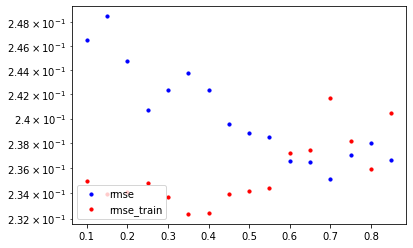

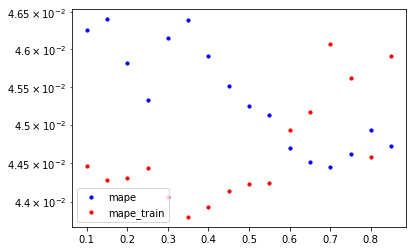

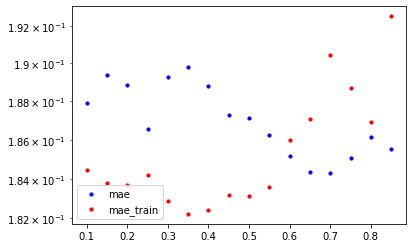

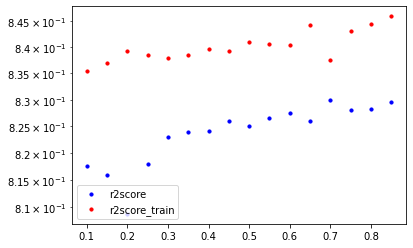

In [76]:
print('rmse', np.min(rmses))
print('mae', np.min(maes))
print('mape', np.min(mapes))
print('r2score', np.max(r2scores))

plot_metrics(indexes, rmses, rmses_train, 'rmse', 'rmse_train', loc = 'lower left')
plot_metrics(indexes, mapes, mapes_train, 'mape', 'mape_train', loc = 'lower left')
plot_metrics(indexes, maes, maes_train, 'mae', 'mae_train', loc = 'lower left')
plot_metrics(indexes, r2scores, r2scores_train, 'r2score', 'r2score_train', loc = 'lower left')

In [85]:
indep, dep = get_independent_keys(df)
X = df[indep]
y = df[dep]

In [86]:
rmses = []
maes = []
r2scores = []
mapes = []
indexes = []

rmses_train = []
maes_train = []
r2scores_train = []
mapes_train = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)
for i in range(1, 5):
    print(i)
    
    poly = PolynomialFeatures(degree = i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)

    clf = LinearRegression()
    clf.fit(X_poly_train, y_train)

    y_poly_pred = clf.predict(X_poly_test)
    _X_train = clf.predict(X_poly_train)
    
    rmses_train.append(get_rmse(y_train, _X_train))
    maes_train.append(get_mae(y_train, _X_train))
    r2scores_train.append(get_r2score(y_train, _X_train))
    mapes_train.append(get_mape(y_train, _X_train))
    
    r2score = get_r2score(y_test, y_poly_pred)
    mae = get_mae(y_test, y_poly_pred)
    rmse = get_rmse(y_test, y_poly_pred)
    mape = get_mape(y_test, y_poly_pred)

    rmses.append(rmse)
    maes.append(mae)
    r2scores.append(r2score)
    mapes.append(mape)
    indexes.append(i)
    

1
2
3
4


rmse 0.23969809804111084 [0.23969809804111084, 0.260792953359558, 176.17664966684873, 12016.253655442111]
mae 0.18810287495576308 [0.18810287495576308, 0.19049001984980019, 13.064946248151564, 611.7538653133879]
mape 0.04511558218403205 [0.04511558218403205, 0.04512844515979499, 2.7499454312595186, 117.94504771466495]
r2score 0.8295015870261699 [0.8295015870261699, 0.7981713245868406, -92104.98650627029, -428478799.67626184]


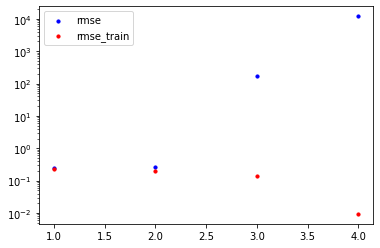

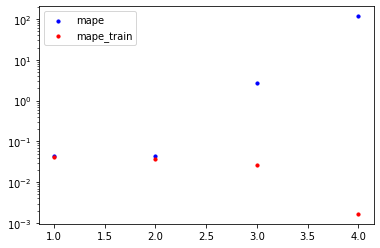

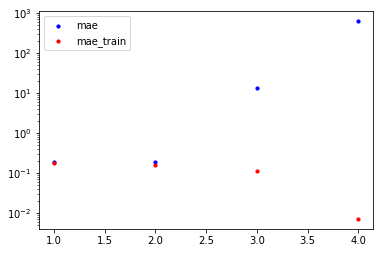

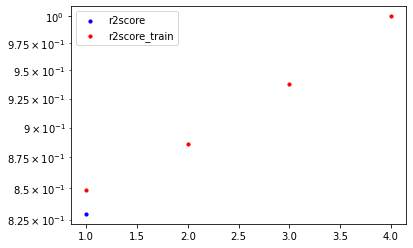

In [87]:
print('rmse', np.min(rmses), rmses)
print('mae', np.min(maes), maes)
print('mape', np.min(mapes), mapes)
print('r2score', np.max(r2scores), r2scores)

plot_metrics(indexes, rmses, rmses_train, 'rmse', 'rmse_train', loc = 'upper left')
plot_metrics(indexes, mapes, mapes_train, 'mape', 'mape_train', loc = 'upper left')
plot_metrics(indexes, maes, maes_train, 'mae', 'mae_train', loc = 'upper left')
plot_metrics(indexes, r2scores, r2scores_train, 'r2score', 'r2score_train', loc = 'upper left')

In [80]:
indep, dep = get_independent_keys(df_indep_features)
X = df_indep_features[indep]
y = df_indep_features[dep]

In [89]:
rmses = []
maes = []
r2scores = []
mapes = []
indexes = []

rmses_train = []
maes_train = []
r2scores_train = []
mapes_train = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)
for i in range(1, 5):
    print(i)
    
    poly = PolynomialFeatures(degree = i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)

    clf = LinearRegression()
    clf.fit(X_poly_train, y_train)
    

    y_poly_pred = clf.predict(X_poly_test)
    _X_train = clf.predict(X_poly_train)
    
    rmses_train.append(get_rmse(y_train, _X_train))
    maes_train.append(get_mae(y_train, _X_train))
    r2scores_train.append(get_r2score(y_train, _X_train))
    mapes_train.append(get_mape(y_train, _X_train))
    
    r2score = get_r2score(y_test, y_poly_pred)
    mae = get_mae(y_test, y_poly_pred)
    rmse = get_rmse(y_test, y_poly_pred)
    mape = get_mape(y_test, y_poly_pred)

    rmses.append(rmse)
    maes.append(mae)
    r2scores.append(r2score)
    mapes.append(mape)
    indexes.append(i)
    

1
2
3
4


rmse 0.23492715746255838 [0.24206975270956924, 0.23492715746255838, 0.2906454516124795, 4.192632243474407]
mae 0.18397046825851396 [0.18948682274942308, 0.18397046825851396, 0.2038791507713024, 0.8092658096073558]
mape 0.04370952981959528 [0.04538465668990782, 0.04370952981959528, 0.04812168290950824, 0.19700262097521384]
r2score 0.8362212271755756 [0.8261109567721641, 0.8362212271755756, 0.7493208422984847, -51.163257536532214]


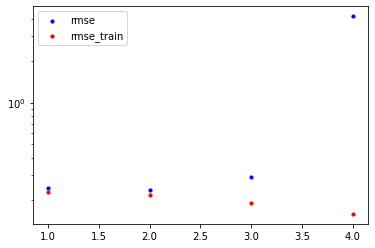

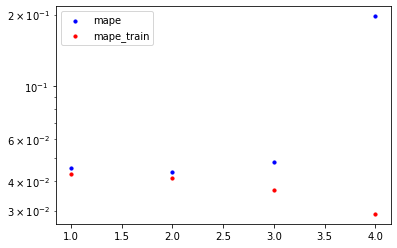

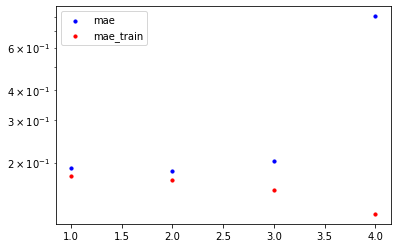

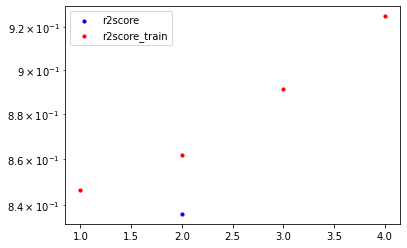

In [84]:
print('rmse', np.min(rmses), rmses)
print('mae', np.min(maes), maes)
print('mape', np.min(mapes), mapes)
print('r2score', np.max(r2scores), r2scores)

plot_metrics(indexes, rmses, rmses_train, 'rmse', 'rmse_train', loc = 'upper left')
plot_metrics(indexes, mapes, mapes_train, 'mape', 'mape_train', loc = 'upper left')
plot_metrics(indexes, maes, maes_train, 'mae', 'mae_train', loc = 'upper left')
plot_metrics(indexes, r2scores, r2scores_train, 'r2score', 'r2score_train', loc = 'upper left')

In [92]:
indep, dep = get_independent_keys(df_indep_features)
X = df_indep_features[indep]
y = df_indep_features[dep]

/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.45791542079891, tolerance: 6.243135270987192
  model = cd_fast.enet_coordinate_descent(
/Users/boss/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.42636371775572, tolerance: 6.243135270987192
  model = cd_fast.enet_coordinate_descent(


0.0007735428350490459


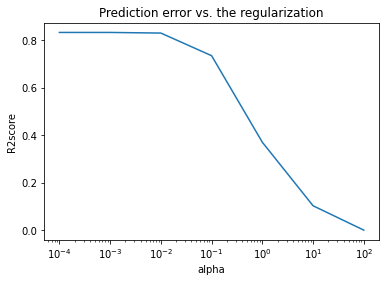

In [94]:
arr = []
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
indexes_2 = []
for alpha in alphas:
    lasmodel = linear_model.Lasso(alpha=alpha,fit_intercept=False)
    lasmodel.fit(X, y)
    indexes_2.append(alpha)
    arr.append(r2_score(y, lasmodel.predict(X)))
# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

arr = np.array(arr)

indexes_2 = np.array(indexes_2)
print(arr.min())

plt.plot(indexes_2, arr)
plt.xscale('log', base=10)
plt.xlabel('alpha')
plt.title('Prediction error vs. the regularization')
plt.ylabel('R2score')
plt.show()

In [40]:
indep, dep = get_independent_keys(df)
X = df[indep]
y = df[dep]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 0)

poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

clf = LinearRegression()
clf.fit(X_poly_train, y_train)

scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.85349884, 0.81136316, 0.82688845, 0.78977643, 0.85056112])

In [42]:
# >>> from sklearn.model_selection import ShuffleSplit
# >>> n_samples = X.shape[0]
# >>> cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
# >>> cross_val_score(clf, X, y, cv=cv)
# array([0.977..., 0.977..., 1.  ..., 0.955..., 1.        ])

In [43]:
# 2, 3, 4 dimensional mape vs CV above

# rmse 0.260792953359558 [0.260792953359558, 176.17664966684873, 12016.253655442111]
# mae 0.19049001984980019 [0.19049001984980019, 13.064946248151564, 611.7538653133879]
# mape 0.04512844515979499 [0.04512844515979499, 2.7499454312595186, 117.94504771466495]
# r2score 0.7981713245868406 [0.7981713245868406, -92104.98650627029, -428478799.67626184]

In [110]:
rmses = []
maes = []
r2scores = []
mapes = []
indexes = []

rmses_train = []
maes_train = []
r2scores_train = []
mapes_train = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)
for i in range(1, 5):
    print(i)
    
    poly = PolynomialFeatures(degree = i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)

    clf = LinearRegression()
    clf.fit(X_poly_train, y_train)
    
    scores = cross_val_score(clf, X_train, y_train, cv = 5)
    print(scores.mean())

    y_poly_pred = clf.predict(X_poly_test)
    _X_train = clf.predict(X_poly_train)
    
    rmses_train.append(get_rmse(y_train, _X_train))
    maes_train.append(get_mae(y_train, _X_train))
    r2scores_train.append(get_r2score(y_train, _X_train))
    mapes_train.append(get_mape(y_train, _X_train))
    
    r2score = get_r2score(y_test, y_poly_pred)
    mae = get_mae(y_test, y_poly_pred)
    rmse = get_rmse(y_test, y_poly_pred)
    mape = get_mape(y_test, y_poly_pred)

    rmses.append(rmse)
    maes.append(mae)
    r2scores.append(r2score)
    mapes.append(mape)
    indexes.append(i)
    

1
0.8435952404186828
2
0.8435952404186828
3
0.8435952404186828
4
0.8435952404186828


rmse 0.23492715746255838 [0.24206975270956924, 0.23492715746255838, 0.2906454516124795, 4.192632243474407]
mae 0.18397046825851396 [0.18948682274942308, 0.18397046825851396, 0.2038791507713024, 0.8092658096073558]
mape 0.04370952981959528 [0.04538465668990782, 0.04370952981959528, 0.04812168290950824, 0.19700262097521384]
r2score 0.8362212271755756 [0.8261109567721641, 0.8362212271755756, 0.7493208422984847, -51.163257536532214]


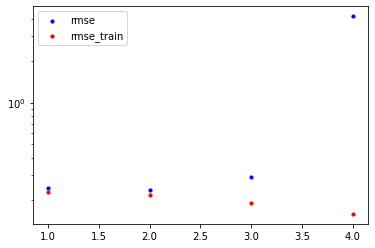

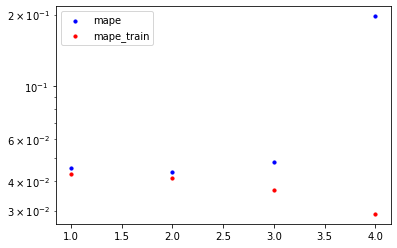

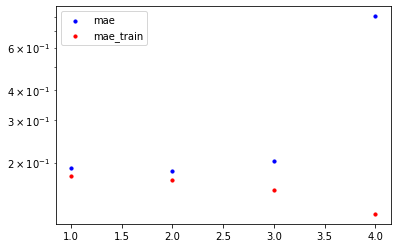

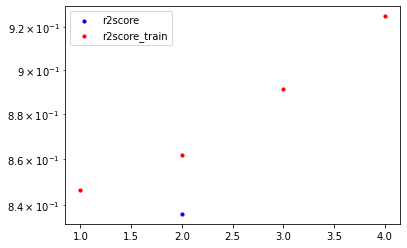

In [111]:
print('rmse', np.min(rmses), rmses)
print('mae', np.min(maes), maes)
print('mape', np.min(mapes), mapes)
print('r2score', np.max(r2scores), r2scores)

plot_metrics(indexes, rmses, rmses_train, 'rmse', 'rmse_train', loc = 'upper left')
plot_metrics(indexes, mapes, mapes_train, 'mape', 'mape_train', loc = 'upper left')
plot_metrics(indexes, maes, maes_train, 'mae', 'mae_train', loc = 'upper left')
plot_metrics(indexes, r2scores, r2scores_train, 'r2score', 'r2score_train', loc = 'upper left')


1
2
3
4
{1: [0.8428401766561631, 0.8413617933552172, 0.8432420112639323, 0.8435952404186793, 0.8402544668681963, 0.8400303595264405, 0.8420702791176155, 0.8405581380637804], 2: [0.8300523785088385, 0.8410006641668145, 0.8385883770475481, 0.841230052558309, 0.8391201280013708, 0.8405420399962819, 0.8452189708369595, 0.8407504645404813], 3: [-0.14701073457816027, 0.5280003411342941, 0.6852816484107103, 0.5077622195696394, 0.0982687495948175, 0.3228868731978121, 0.67181578405295, 0.5863258489996688], 4: [-14672798.894544737, -260479.7811029414, -108867.01694805427, -6729.85720513372, -9653.828129479192, -2489.0122849991794, -3976.88028566091, -2910.0777891371285]}


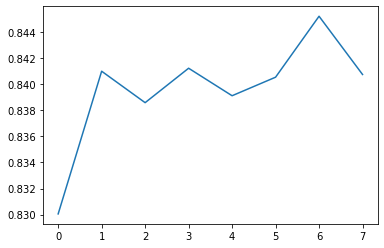

In [107]:
rmses = []
maes = []
r2scores = []
mapes = []
indexes = []

rmses_train = []
maes_train = []
r2scores_train = []
mapes_train = []
dim_cv = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)

for i in range(1, 5):
    dim_cv[i] = []
    print(i)
    for j in range(2, 10):
        poly = PolynomialFeatures(degree = i)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.fit_transform(X_test)

        clf = LinearRegression()
        clf.fit(X_poly_train, y_train)


        y_poly_pred = clf.predict(X_poly_test)
        _X_train = clf.predict(X_poly_train)

        scores = cross_val_score(clf, X_poly_train, y_train, cv = j)
        dim_cv[i].append(scores.mean())
#         print('dim -', i, 'cv -', j)
#         print(scores.mean())


        rmses_train.append(get_rmse(y_train, _X_train))
        maes_train.append(get_mae(y_train, _X_train))
        r2scores_train.append(get_r2score(y_train, _X_train))
        mapes_train.append(get_mape(y_train, _X_train))

        r2score = get_r2score(y_test, y_poly_pred)
        mae = get_mae(y_test, y_poly_pred)
        rmse = get_rmse(y_test, y_poly_pred)
        mape = get_mape(y_test, y_poly_pred)

        rmses.append(rmse)
        maes.append(mae)
        r2scores.append(r2score)
        mapes.append(mape)
        indexes.append(i)
print(dim_cv)
indexes = range(2, 10)
plt.plot(dim_cv[2])
plt.show()